# Import dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('weight-height.csv')

In [2]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
df.shape

(8555, 3)

# Define x and y dataset

In [99]:
x = df.drop('Gender', axis=1)

In [100]:
y = df['Gender']

In [101]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [126]:
y.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

# Split the dataset into training and testing sets

In [103]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.30, random_state=42)

In [104]:
xtrain.shape

(5988, 2)

# Apply the KNeighborsClassifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# Fit the model

In [106]:
classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

# Accuracy testing

In [127]:
classifier.score(xtest, ytest)

0.9131281651733542

In [134]:
classifier.score(xtrain, ytrain)

0.9291917167668671

# Import matrix

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [140]:
pred = classifier.predict(xtest)
pred

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [141]:
import numpy as np
np.array(ytest)

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Female'],
      dtype=object)

# Confusion matrix

In [142]:
cf_matrix = confusion_matrix(ytest, pred)
print(cf_matrix)

[[ 945  121]
 [ 102 1399]]


# Heat_map

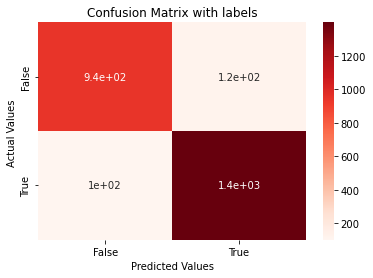

In [143]:
hp = sns.heatmap(cf_matrix, annot=True, cmap='Reds')

hp.set_title('Confusion Matrix with labels');
hp.set_xlabel('Predicted Values')
hp.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
hp.xaxis.set_ticklabels(['False','True'])
hp.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [144]:
tp,fn,fp,tn = confusion_matrix(ytest, testing).reshape(-1)

In [145]:
Accuracy = (tp+tn)/(tp+tn+fn+fp)
Accuracy

0.9131281651733542

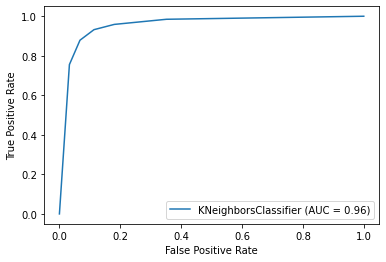

In [146]:
plot_roc_curve(classifier,xtest,ytest)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [147]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n      Female       0.90      0.89      0.89      1066\n        Male       0.92      0.93      0.93      1501\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [125]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

      Female       0.90      0.89      0.89      1066
        Male       0.92      0.93      0.93      1501

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567

